# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

In [6]:
y = pd.DataFrame(boston.target, columns=["prices"])
y.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.092925,0.028868,0.103112,-0.018861,0.036227,-0.079852,0.000636,0.019929,0.125651,0.167896,0.049259,-0.086331,0.044178
std,1.095444,1.040221,1.059604,0.970888,0.992432,1.058753,0.982033,1.114840,1.076657,1.068477,0.964095,1.118614,0.984658
min,-0.404180,-0.484552,-1.442425,-0.275659,-1.416002,-3.534625,-2.203874,-1.305037,-0.968816,-1.293576,-2.661935,-4.040067,-1.317273
25%,-0.394646,-0.484552,-0.891207,-0.275659,-0.907923,-0.624357,-0.937087,-0.835176,-0.615612,-0.704303,-0.650569,0.172213,-0.745281
50%,-0.374454,-0.484552,-0.136438,-0.275659,-0.081218,-0.201770,0.315566,-0.312563,-0.497878,-0.291204,0.309401,0.366939,-0.117519
75%,0.166122,0.112249,1.065545,-0.275659,0.622773,0.470890,0.892423,0.670124,1.739080,1.616340,0.812243,0.418199,0.574379
max,8.403458,3.855817,2.497821,3.627671,2.734745,3.593538,1.110621,4.103895,1.739080,1.889714,1.635075,0.431270,3.543090


# 4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
linear_regressor = LinearRegression()
ridge_regressor_small_alpha = Ridge(alpha = 0.01)
ridge_regressor_large_alpha = Ridge(alpha = 100)

5. Entraînez ces modèles sur les données sur les données d’apprentissage

In [9]:
linear_regressor.fit(X_train, y_train)
ridge_regressor_small_alpha.fit(X_train, y_train)
ridge_regressor_large_alpha.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

6. Produisez les scores de performance de c’est trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

In [10]:
print("Linear Regression score : {}".format(linear_regressor.score(X_train, y_train)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_train, y_train)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_train,y_train)))

Linear Regression score : 0.7731607676999066
Ridge with small Alpha score : 0.773160765035742
Ridge with large Alpha score : 0.738671994114277


In [11]:
print("Linear Regression score : {}".format(linear_regressor.score(X_test, y_test)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_test, y_test)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_test,y_test)))

Linear Regression score : 0.6341665102184066
Ridge with small Alpha score : 0.6341792575582138
Ridge with large Alpha score : 0.6664943713526277


7. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

In [12]:
linear_regressor.coef_[0]

array([-1.30927918,  1.2886076 ,  0.11918383,  0.61421328, -2.44541763,
        2.70055559,  0.29966743, -3.45435184,  2.84205126, -1.74540118,
       -2.17616125,  0.92594575, -4.06402815])

In [13]:
coef = pd.DataFrame() # on créé un dataframe pour analyser les coefficients
coef['features'] = boston_df.columns
coef['coef_linear_regressor'] = linear_regressor.coef_[0]
#coef['coef_abs_linear_regressor'] = np.abs(linear_regressor.coef_[0])
coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_[0]
#coef['coef_abs_ridge_small_alpha'] = np.abs(ridge_regressor_small_alpha.coef_[0])
coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_[0]
#coef['coef_abs_ridge_large_alpha'] = np.abs(ridge_regressor_large_alpha.coef_[0])
coef.head(10)

,features,coef_linear_regressor,coef_ridge_small_alpha,coef_ridge_large_alpha
0,CRIM,-1.309279,-1.309139,-0.824130
1,ZN,1.288608,1.288352,0.623174
2,INDUS,0.119184,0.118871,-0.451460
3,CHAS,0.614213,0.614273,0.696812
4,NOX,-2.445418,-2.444968,-0.897553
5,RM,2.700556,2.700716,2.818728
6,AGE,0.299667,0.299536,-0.081048
7,DIS,-3.454352,-3.453934,-1.601905
8,RAD,2.842051,2.841030,0.637345
9,TAX,-1.745401,-1.744490,-0.432902


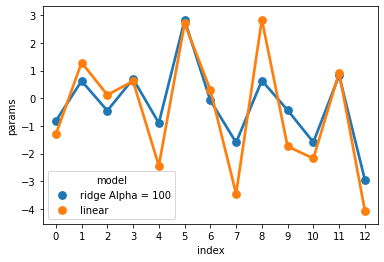

In [14]:
perf_ridge_large_alpha = pd.DataFrame({"params": ridge_regressor_large_alpha.coef_[0], 
                                       "model": "ridge Alpha = 100", 
                                       "index": range(0, len(boston_df.columns))})

perf_lin = pd.DataFrame({"params": linear_regressor.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(boston_df.columns))})

perf_compar = pd.concat([perf_ridge_large_alpha,perf_lin])

import seaborn as sns
sns.pointplot(x = 'index',y = 'params',hue = 'model', data = perf_compar)

---> On remarque qu'on a pu pénaliser le coefficient lié à la Feature NOX pour en limiter son impact

8. Déterminez la valeur optimale de alpha (à 1 prêt) à l'aide de la fonction GridSearchCV

In [15]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linear_regressor, boston.data,boston.target, cv = 10)) ### CrossValidation = 10
print(cross_val_score(ridge_regressor_small_alpha, boston.data,boston.target, cv = 10))
print(cross_val_score(ridge_regressor_large_alpha, boston.data,boston.target, cv = 10))

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
[ 0.73379224  0.4741527  -0.99413592  0.64093951  0.54826997  0.73671944
  0.37911902 -0.12931018 -0.7686915   0.41877368]
[ 0.6985193   0.47026291 -0.56355669  0.53236784  0.52320523  0.6872926
  0.23662939  0.29928304 -0.42187235  0.26155227]


In [16]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


params = {'alpha':np.arange(0,1000,100),
            'normalize':[True,False]}
ridge = Ridge()

for a in np.arange(0,100,1):
  ridge = Ridge(alpha = a)
    
  kf = KFold(n_splits=10)
    
  for train_index, test_index in kf.split(np.ravel(boston.data)):
    ridge.fit([train_index], [test_index])

grid = GridSearchCV(ridge, params, cv=10)
grid_fit = grid.fit(X_train, y_train)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Carlo/anacond

In [18]:
grid_fit.best_params_

{'alpha': 0, 'normalize': True}

In [19]:
grid_fit.best_estimator_.score(X_test,y_test)

0.6341665102184062

In [20]:
Ridge(alpha=0).fit(X_train,y_train).score(X_test,y_test)

0.6341665102184062

In [21]:
linear_score = pd.DataFrame(np.array([linear_regressor.score(X_test, y_test)])).rename(columns = {0 : 'Linear_Score'})
ridge_small_alpha_score = pd.DataFrame(np.array([ridge_regressor_small_alpha.score(X_test, y_test)])).rename(columns = {0 : 'Ridge_Small_Alpha_Score'})
ridge_large_alpha_score = pd.DataFrame(np.array([ridge_regressor_large_alpha.score(X_test, y_test)])).rename(columns = {0 : 'Ridge_Large_Alpha_Score'})

In [22]:
score = pd.concat((linear_score, ridge_small_alpha_score, ridge_large_alpha_score)).T

In [23]:
score['Linear_Score'] = pd.DataFrame(np.array([linear_regressor.score(X_test, y_test)]))

In [24]:
score

,0,0,0,Linear_Score
Linear_Score,0.634167,NaN,NaN,NaN
Ridge_Small_Alpha_Score,NaN,0.634179,NaN,NaN
Ridge_Large_Alpha_Score,NaN,NaN,0.666494,NaN
